In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Defining Functions

In [2]:
def zscore_normalise(X):
    
    mean = np.mean(X, axis = 0)
    std_dev = np.std(X, axis = 0)
    X_norm = (X - mean)/std_dev
    
    return X_norm

In [3]:
def initialise_parameters(X):
    w = np.zeros((1, X.shape[1]))
    b = 0
    return w,b

In [4]:
def compute_cost(X,y,w,b):
    
    m = X.shape[0]
    f_x = w@X.T + b
    cost = np.sum((f_x - y)**2)/(2*m)
    
    return cost

In [5]:
def gradient(X,y,w,b):
    
    m = X.shape[0]
    f_x = w@X.T + b
    dj_dw = (1/m)*(f_x - y)@X
    dj_db = (1/m)*np.sum(f_x - y)
    
    return dj_dw,dj_db

In [6]:
def gradient_descent(X,y,w_in,b_in,cost,gradient,lr=0.3,iterations=100):
    
    J = []
    w = w_in
    b = b_in
    for i in range(iterations):
        dj_dw,dj_db = gradient(X,y,w,b)
        
        w = w - lr*dj_dw
        b = b - lr*dj_db
        
        if i<1000000:
            J.append(cost(X,y,w,b))
            
        if i%np.ceil(iterations/10)==0:
            print(f"Iteration {i:5d}: Cost {J[-1]}")
        
    print('____________________________________________________________')
    print("Minimum Cost is =",np.min(J))
    print('____________________________________________________________')
    print(f"b,w found by gradient descent:\nb_final = {b:f}\n____________________________________________________________\nw_final =\n {w}")
    
    return w,b,J

In [7]:
def predict(X,wf,bf):
    
    m = X.shape[0]
    pred = wf@X.T + bf
    
    return pred

In [8]:
def r2_score(X,y,w,b):
    
    f_x = w@X.T + b
    ssr = np.sum((y - f_x)**2)
    sst = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ssr/sst)
    
    return r2

In [9]:
def plot_target_vs_predict(y_train,a_train):
    
    style.use('ggplot')
    plt.scatter(y_train,a_train)
    plt.title('Ground Truth vs Predicted Output')
    plt.xlabel('Ground Truth(Target)')
    plt.ylabel('Predicted Output')
    plt.show()

In [32]:
def visualise_data(x,y):
    
    n = x.shape[1]
    style.use('ggplot')
    for i in range(0,n):
        plt.scatter(x[:,i],y)
        plt.title(f'Graph between Feature {i+1} and Ground Truth Label')
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel('Ground Truth Label')
        plt.show()

In [29]:
def cost_vs_iterations(J,iterations):
    style.use('ggplot')
    e = np.array([])
    for i in range(1,iterations+1):
        e = np.append(e,i)
    plt.plot(e,J)
    plt.title('Cost vs Iterations')
    plt.xlabel('No. of Iterations')
    plt.ylabel('Cost')
    plt.show()

In [31]:
def output_vs_pred(X, pred, y):
    #i = np.random.randint(0, 19)
    k = [15,18]
    for i in k:
        style.use('default')
        plt.scatter(X[:,i],y,c='blue', label='True ')
        plt.scatter(X[:,i],pred, marker='*',c='green', label='Predicted')
        plt.xlabel(f"Feature {i+1}")
        plt.ylabel('Label')
        plt.legend()
        plt.show()

# Adding Training, Cross-Validation and Test Data Sets

In [13]:
df = pd.read_csv('Lineardata_train.csv')

df_test = pd.read_csv('Lineardata_test.csv')

In [14]:
X = df.drop('target',axis=1)
y = df.iloc[:,0]
X_train = X.head(40000).to_numpy()
y_train = y.head(40000).to_numpy()
X_cv = X.tail(10000).to_numpy()
y_cv = y.tail(10000).to_numpy()

X_test = df_test.drop('ID', axis=1).to_numpy()

In [15]:
X_train_norm = zscore_normalise(X_train)
X_cv_norm = zscore_normalise(X_cv)
X_test_norm = zscore_normalise(X_test)

# Visualising Training Data

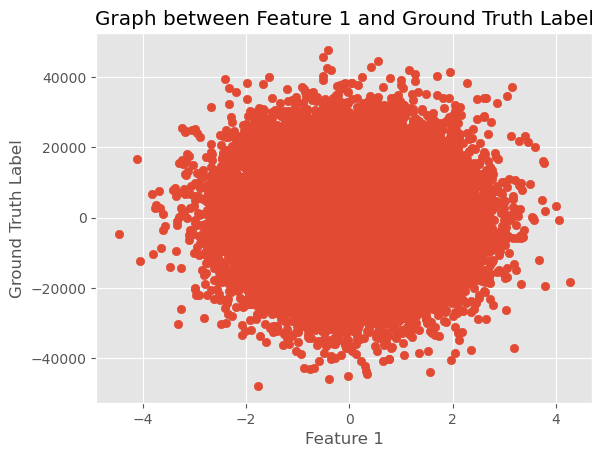

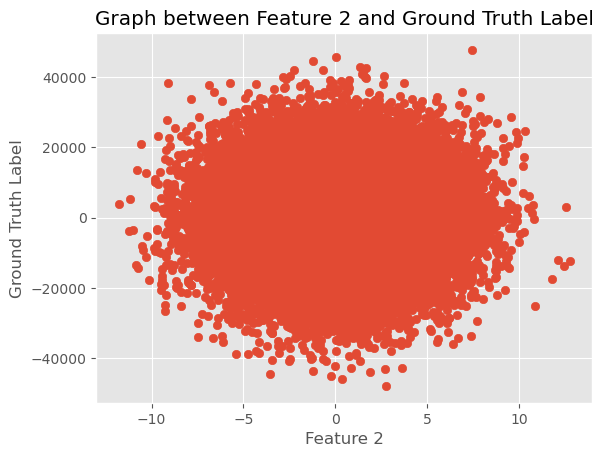

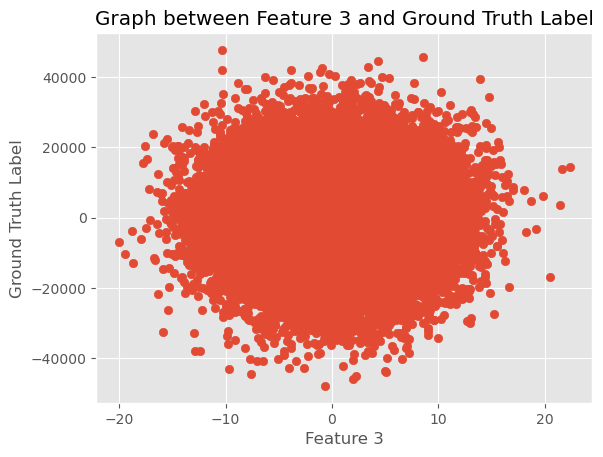

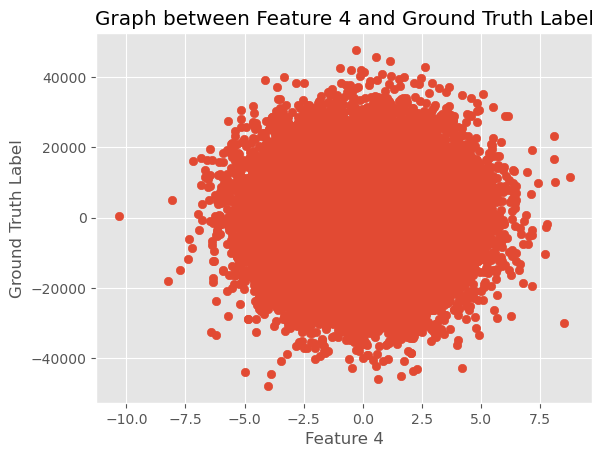

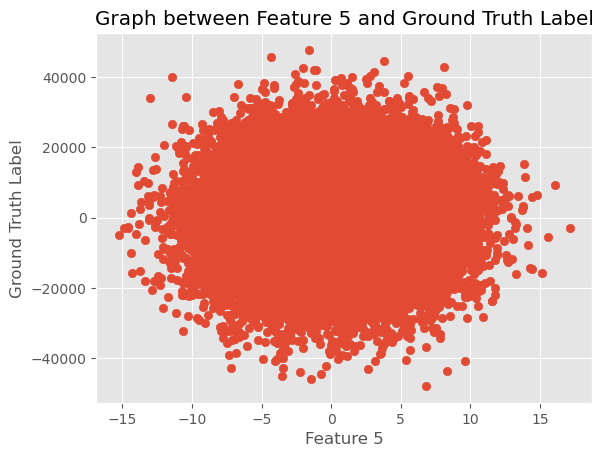

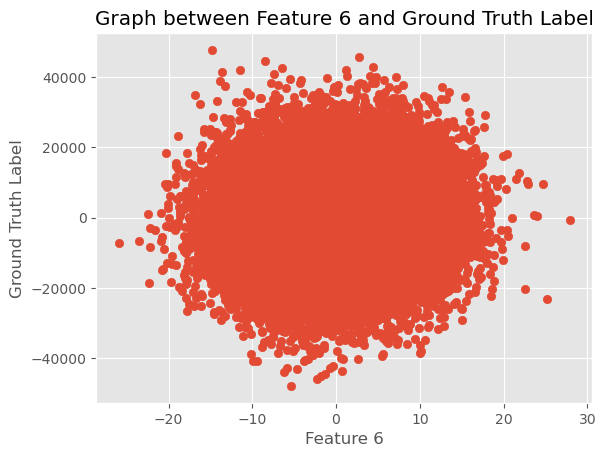

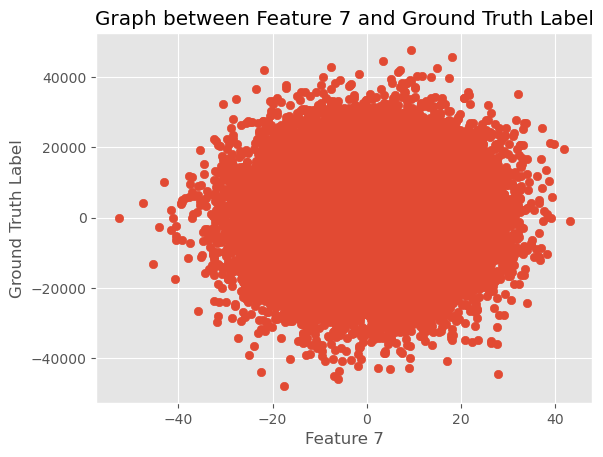

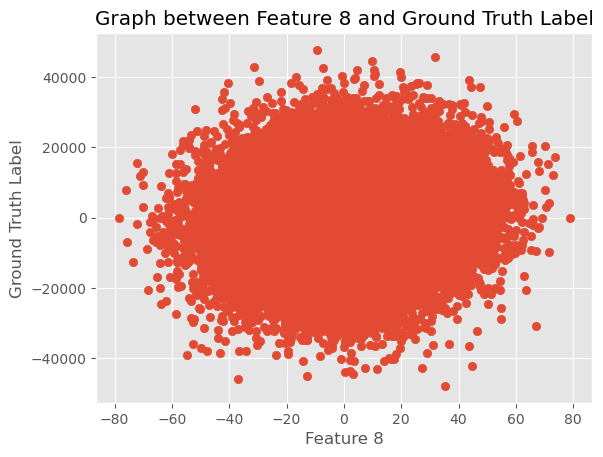

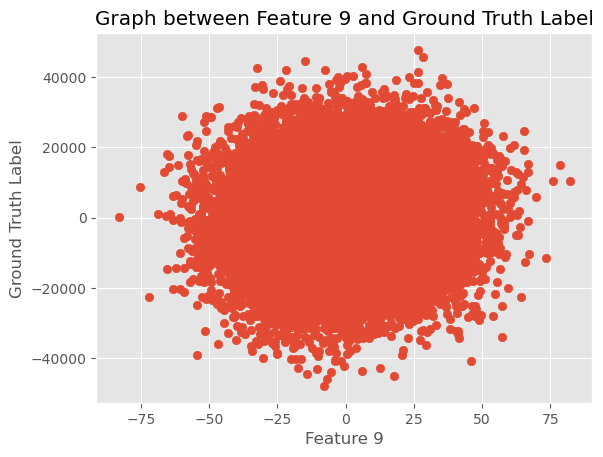

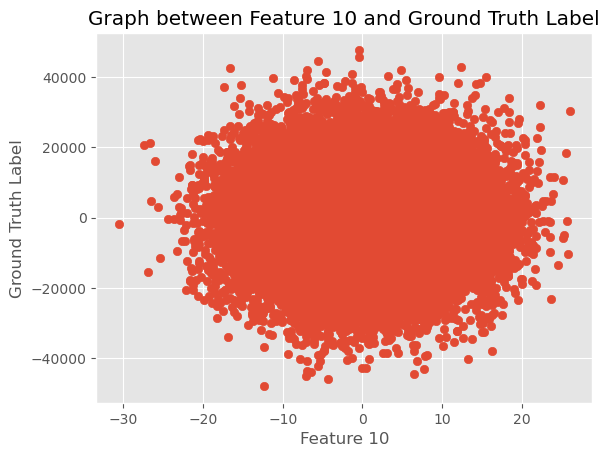

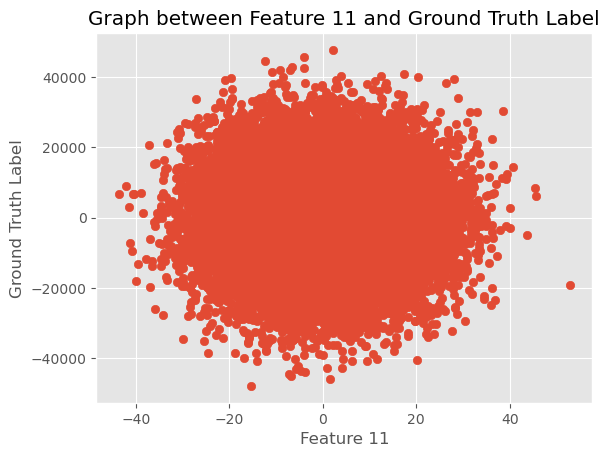

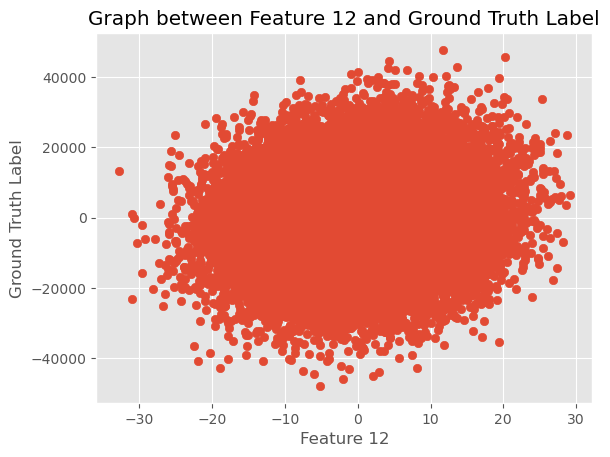

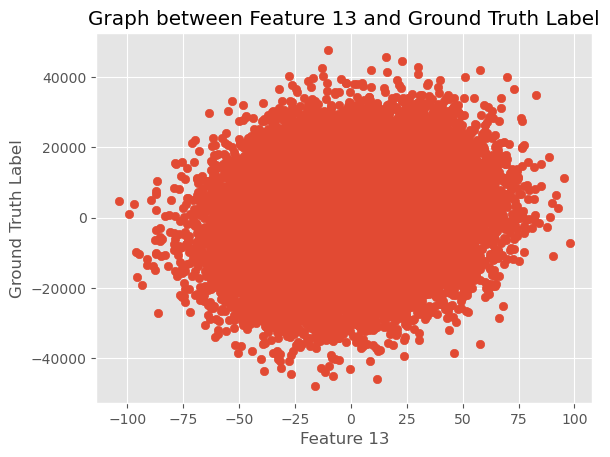

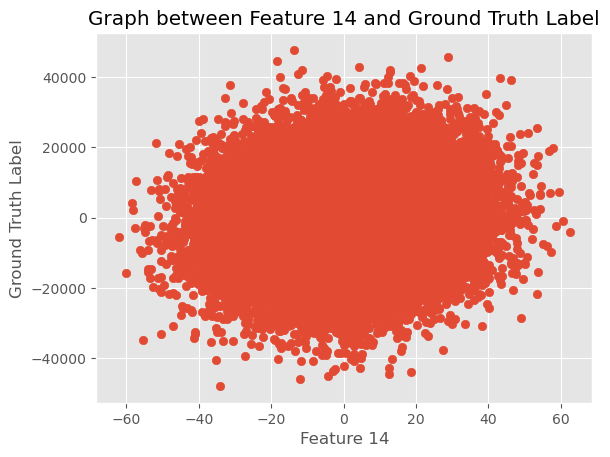

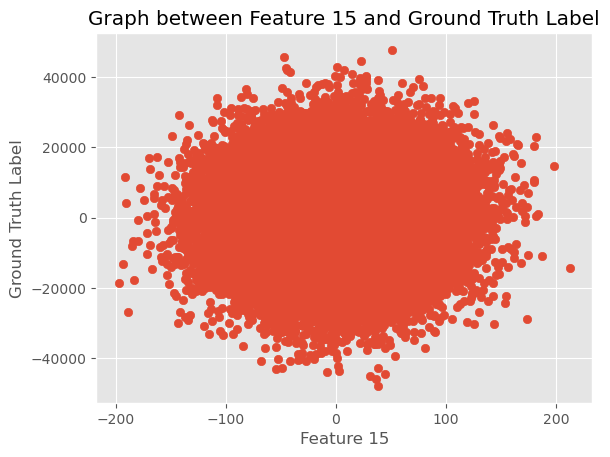

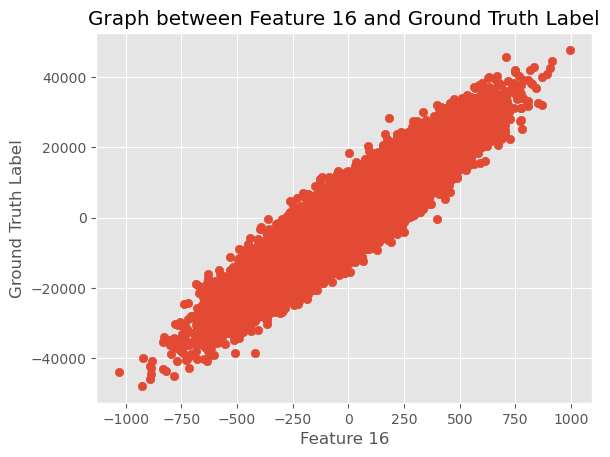

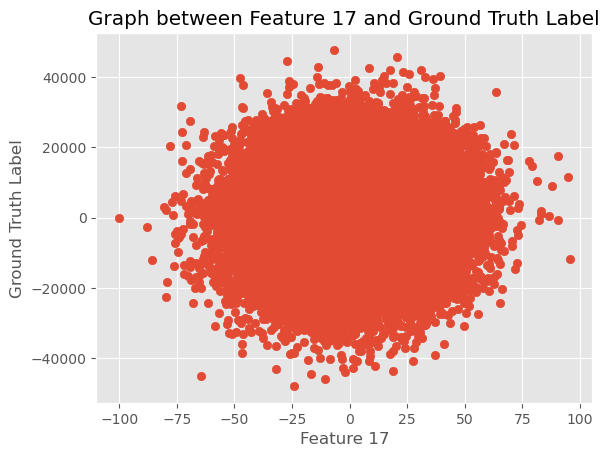

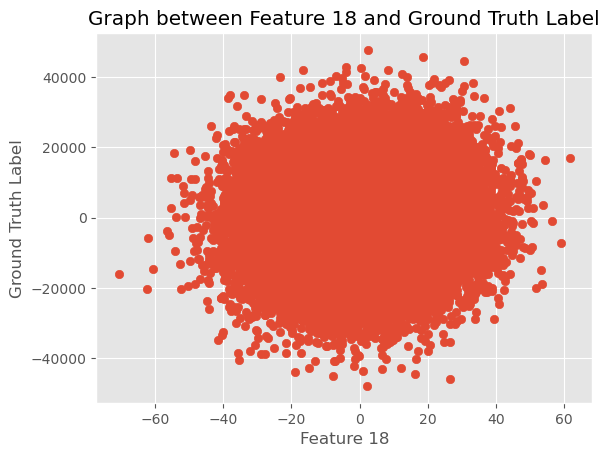

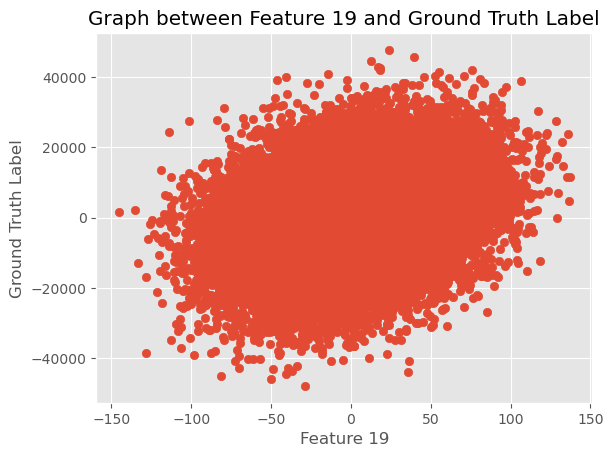

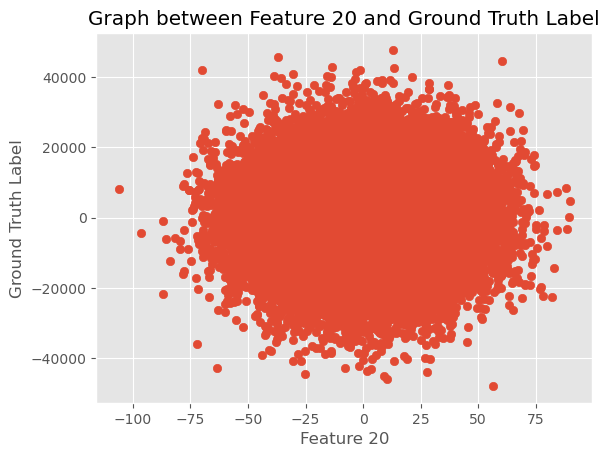

In [33]:
visualise_data(X_train,y_train)

In [17]:
w,b = initialise_parameters(X_train_norm)

# Training Linear Regression Model

In [18]:
alpha = 0.3
iterations = 300

wf,bf,J = gradient_descent(X_train_norm,y_train,w,b,compute_cost,gradient,alpha,iterations)

Iteration     0: Cost 32131685.250508808
Iteration    30: Cost 0.022123038203393914
Iteration    60: Cost 0.005048418083380287
Iteration    90: Cost 0.005048418072069949
Iteration   120: Cost 0.005048418072069921
Iteration   150: Cost 0.005048418072069918
Iteration   180: Cost 0.005048418072069918
Iteration   210: Cost 0.005048418072069918
Iteration   240: Cost 0.005048418072069918
Iteration   270: Cost 0.005048418072069918
____________________________________________________________
Minimum Cost is = 0.005048418072067909
____________________________________________________________
b,w found by gradient descent:
b_final = 77.267064
____________________________________________________________
w_final =
 [[2.20066250e+01 3.31369827e+01 9.97515547e+00 6.04433310e+00
  1.75889769e+02 3.29270434e+02 2.53994823e+02 9.01879215e+02
  4.34971516e+02 8.38181865e+01 1.21184698e+02 1.60335867e+03
  1.67468334e+03 1.31824409e+03 5.97217418e+02 1.05670985e+04
  5.04822106e+02 6.78186528e+02 3.161187

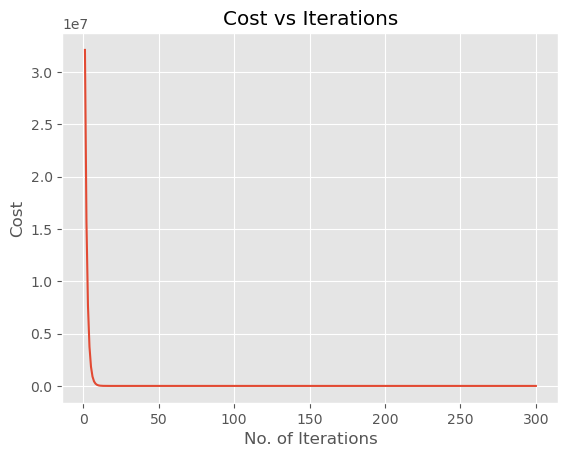

In [30]:
cost_vs_iterations(J, iterations)

In [20]:
R2_train = r2_score(X_train_norm,y_train,wf,bf)
R2_train

0.9999999999232193

# Running the model on CV Data Set

In [21]:
R2_cv = r2_score(X_cv_norm,y_cv,wf,bf)
R2_cv

0.9998732562290893

In [22]:
pred_cv = predict(X_cv_norm,wf,bf)

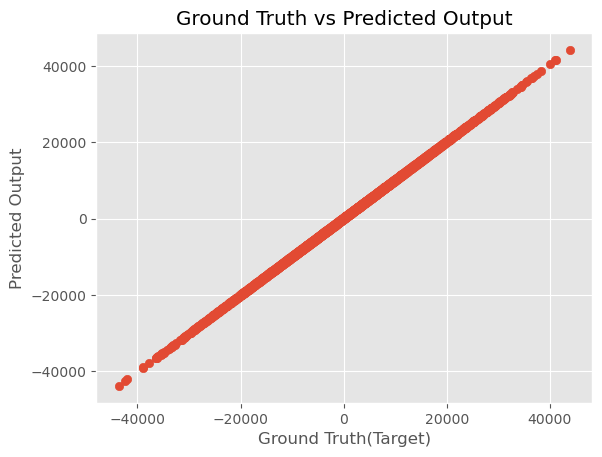

In [23]:
plot_target_vs_predict(y_cv,pred_cv)

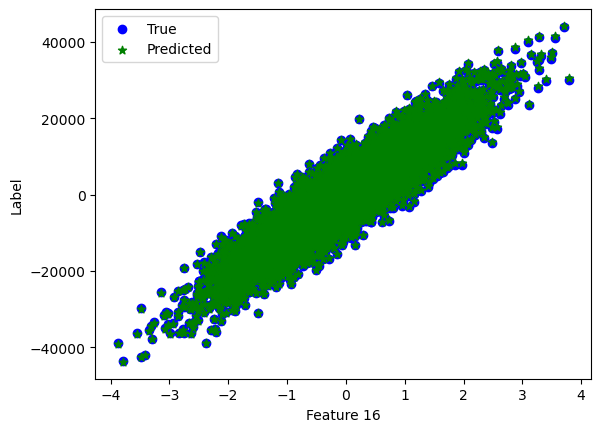

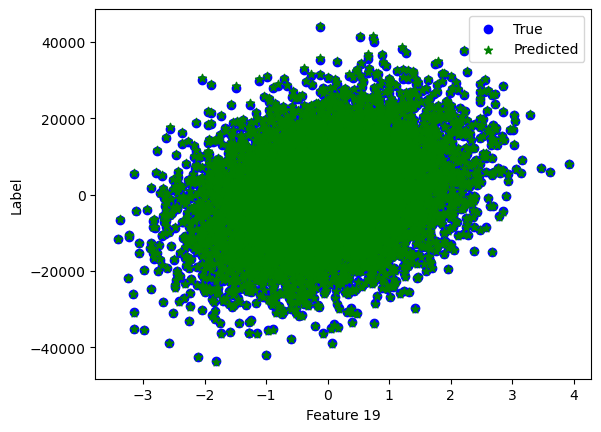

In [34]:
output_vs_pred(X_cv_norm,pred_cv,y_cv)

# Running the model on the Test Data Set

In [25]:
df_t = pd.DataFrame(predict(X_test_norm,wf,bf).T, columns=['Predictions'])
df_t

,Predictions
0,-5428.070702
1,17699.766828
2,4679.185755
3,2737.467435
4,3487.239152
...,...
9995,4206.871771
9996,-16041.362827
9997,9563.390266
9998,-15206.474657


In [26]:
df_t.to_csv('Linear_pred.csv')